1. Initial data importing and cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data = train_data[train_data['Embarked'].notna()]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [4]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [5]:
train_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

2. Verification of correlation between variables with graphical plots.

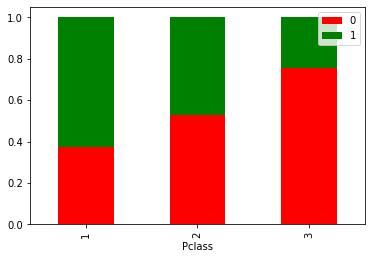

In [6]:
import seaborn as sns

data = pd.crosstab(train_data['Pclass'], train_data['Survived'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['red', 'green'], grid=False)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Count'>

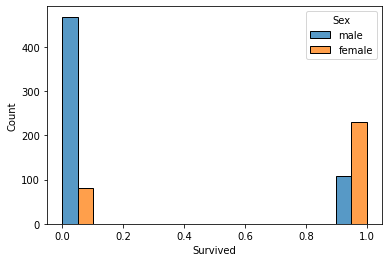

In [7]:
sns.histplot(x="Survived", data=train_data, bins=10, hue='Sex', element='bars', multiple='dodge')

<AxesSubplot:xlabel='Age', ylabel='Count'>

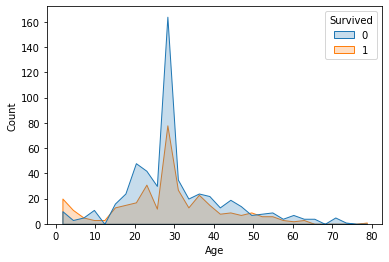

In [8]:
sns.histplot(x='Age', data=train_data, hue='Survived', element='poly')

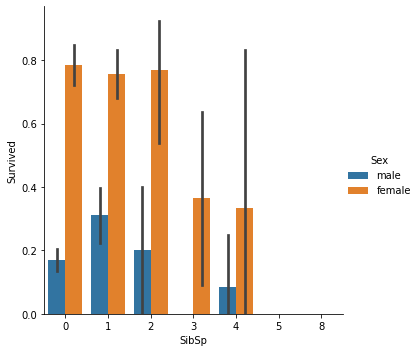

In [9]:
sns.catplot(x="SibSp", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

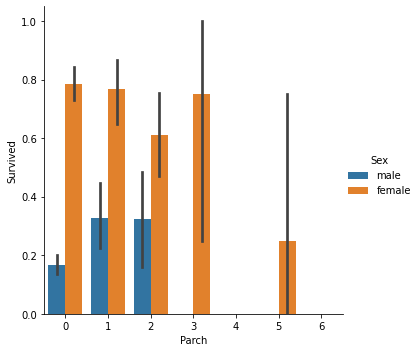

In [10]:
sns.catplot(x="Parch", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

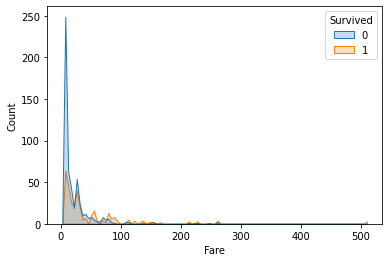

In [11]:
sns.histplot(x='Fare', data=train_data, hue='Survived', element='poly')

<AxesSubplot:xlabel='Sex,Survived'>

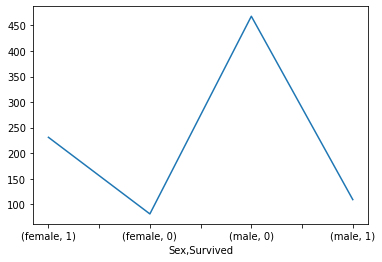

In [12]:
train_data.groupby('Sex')['Survived'].value_counts().plot()

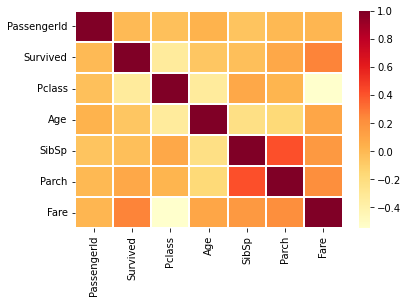

In [13]:
corr = train_data.corr(method='pearson')

x = sns.heatmap(corr, cmap='YlOrRd', linewidths=0.1)

    2.1. After the above heatmap, results were not satisfactory. So we decided to remove the variables that had a low correlation with the target variable and prepare data for another heatmap analysis.

In [14]:
correlationdf = train_data.drop(['PassengerId','Fare', 'Name', 'Cabin', 'Ticket'], axis=1)

correlationdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [15]:
#Applying One Hot Encoding to the Sex Column 

correlationdf['Sex'] = correlationdf['Sex'].replace('male', 1)
correlationdf['Sex'] = correlationdf['Sex'].replace('female', 0)

#Applying Label Encoding (We should use only when there is a ordinal relationship among the variables)
correlationdf['Embarked'] = correlationdf['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)

correlationdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,0
3,1,1,0,35.0,1,0,0
4,0,3,1,35.0,0,0,0


Important! I learned that is not correct to use Stardartization for the entire dataset. Stardartization is only for the training set. Due to data leakage, this process can introduce bias to the model.

I only discovered this after I finished the analysis of the data. So I am going to comment this part and stardartize the data only for the training set on the next section.

In [16]:
# from sklearn import preprocessing
# #Applying Standartization to the data  
# correlationdf['Age'] = preprocessing.scale(correlationdf['Age'])

# correlationdf.head()

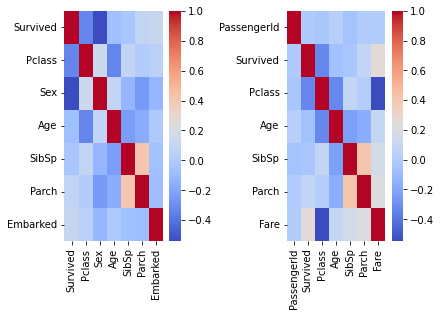

In [17]:
#Plotting and comparing the heatmaps after data processing

corr2 = correlationdf.corr(method='pearson')

#sns.heatmap(corr2, cmap='coolwarm', linewidths=0.1)
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(corr2,cmap='coolwarm', ax=ax1)
sns.heatmap(corr,cmap='coolwarm', ax=ax2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)
plt.show()


After the analysis, we found that the variables that had a high correlation with the target variable are:

<li>Pclass</li>
<li>Sex</li>
<li>Age</li>
<li>SibSp</li>
<li>Parch</li>

The Fare column doesn't have a correlation holistically that we can do any initial analysis, so it's best that we take it out of our model.

3. Machine Learning Algorithms

As I said before, I tried first Standardization on the Age column before separating into training and test sets, so the table below, represents the accuracy of the models when I standartize the Age column while not knowing about data leakage.

| Model                  | Accuracy |
|------------------------|----------|
| Logistic Regression    | 0.758    |
| Support Vector Machine | 0.762    |
| K-Nearest Neighbors    | 0.735    |
| Naive Bayes            | 0.753    |
| Decision Tree          | 0.731    |
| Random Forest          | 0.749    |

This is only for knowledge purpose and will not affect our results.

In [18]:
#Splitting the data into training and testing data for checking accuracy of the models
from sklearn.model_selection import train_test_split

X = correlationdf.loc[:, correlationdf.columns != 'Survived']
y = correlationdf.loc[:, correlationdf.columns == 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [19]:
#Checking shapes of the training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(correlationdf.shape)

(666, 6)
(223, 6)
(666, 1)
(223, 1)
(889, 7)


In [43]:
from sklearn import preprocessing
#Applying Standartization to the data  
X_train['Age'] = preprocessing.scale(X_train['Age'])
X_test['Age'] = preprocessing.scale(X_test['Age'])
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
318,1,0,0.139515,0,2,0
705,2,1,0.749099,0,0,0
347,3,0,-0.089080,1,0,0
490,3,1,-0.089080,1,0,0
441,3,1,-0.698664,0,0,0


    3.1. We will use the following classification algorithms:
<ol>
    <li>Logistic Regression</li>
    <li>Support Vector Machine</li>
    <li>K-Nearest Neighbors</li>
    <li>Naive Bayes</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
</ol>



        3.1.1 Logistic Regression

In [44]:
#Applying Logistic Regression Model

from sklearn.linear_model import LogisticRegression
LogClassifier = LogisticRegression(random_state = 0)
LogClassifier.fit(X_train, y_train)

c:\Users\patrick.vieira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_log = LogClassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
print(cm)
accuracy_score(y_test, y_pred_log)

[[107  25]
 [ 29  62]]


0.757847533632287

In [56]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
14,3,0,-1.257991,0,0,0
159,3,1,-0.139882,8,2,0
763,1,0,0.499038,1,2,0
741,1,1,0.499038,1,0,0
483,3,0,2.655392,0,0,0


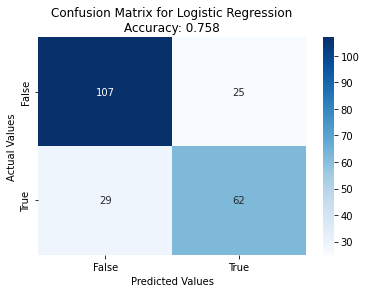

In [46]:
#Function for Confusion Matrix to be plotted in each classification model

def CfMatrix(cf_matrix, Model, y_pred):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

    ax.set_title('Confusion Matrix for '+ str(Model)+ '\nAccuracy: ' + str(round(accuracy_score(y_test, y_pred),3)))
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

CfMatrix(cm, 'Logistic Regression',y_pred_log)

        3.1.2 Support Vector Machine

In [74]:
from sklearn.svm import SVC

SVC_Classifier = SVC(kernel = 'linear', random_state = 0, probability = True)
SVC_Classifier.fit(X_train, y_train)

c:\Users\patrick.vieira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True, random_state=0)

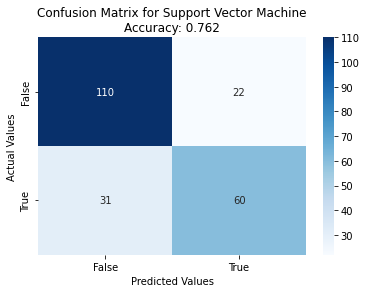

In [75]:
y_pred_SVC = SVC_Classifier.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_SVC)
CfMatrix(cm_svc, 'Support Vector Machine',y_pred_SVC)

        3.1.3 K-Nearest Neighbors

c:\Users\patrick.vieira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


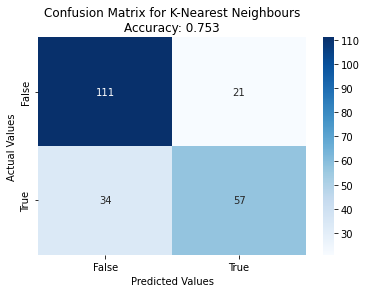

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_Classifier.fit(X_train, y_train)

y_pred_KNN = KNN_Classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_KNN)
CfMatrix(cm_knn, 'K-Nearest Neighbours',y_pred_KNN)

        3.1.4 Naive Bayes

c:\Users\patrick.vieira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


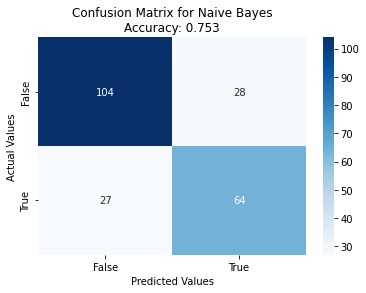

In [50]:
from sklearn.naive_bayes import GaussianNB

NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train, y_train)

y_pred_NB = NB_Classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_NB)
CfMatrix(cm_nb, 'Naive Bayes',y_pred_NB)

        3.1.5 Decision Tree

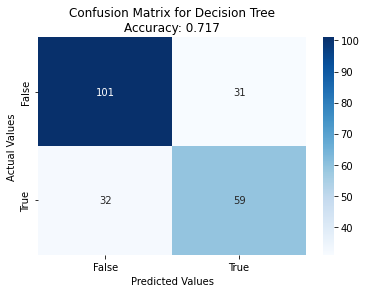

In [51]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Decision_Tree_Classifier.fit(X_train, y_train)
y_pred_DT = Decision_Tree_Classifier.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_DT)
CfMatrix(cm_dt, 'Decision Tree',y_pred_DT)

        3.1.6 Random Forest

C:\Users\patrick.vieira\AppData\Local\Temp\ipykernel_25164\671055915.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_Classifier.fit(X_train, y_train)


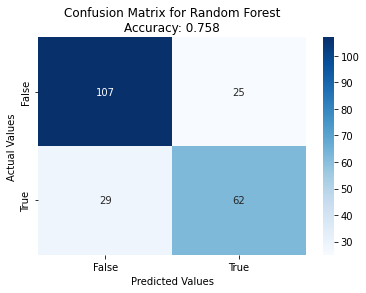

In [53]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_Classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
RandomForest_Classifier.fit(X_train, y_train)
y_pred_RF = RandomForest_Classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_RF)
CfMatrix(cm_rf, 'Random Forest',y_pred_RF)

Since we can't just measure using Accuracy score for each model, we are going to plot the ROC curve for each model. The Receiver Operating Characteristic Curve is a plot of the sensitivity (TPR) against the specificity (FPR) of a classifier.

In [66]:
from sklearn.metrics import roc_curve, auc

def ROC_Curve(classifier, ModelLabel):
    plt.figure(figsize = (10, 6))
    plt.plot([0,1], [0,1], 'r--')

    probs = classifier.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = ModelLabel + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)
    plt.show()

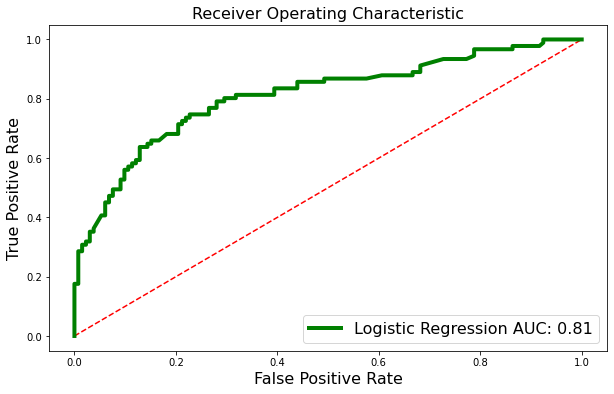

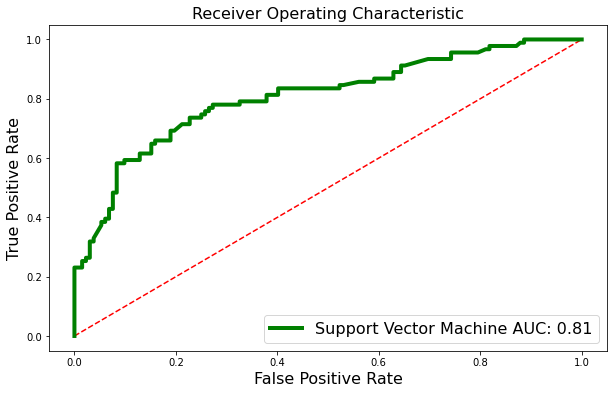

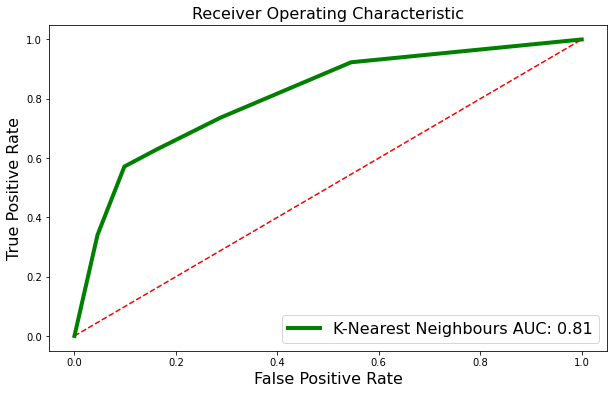

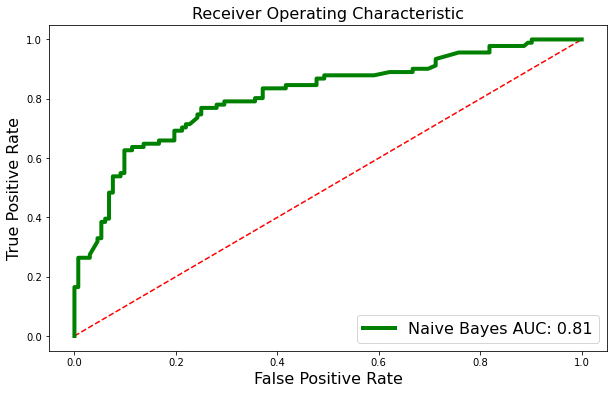

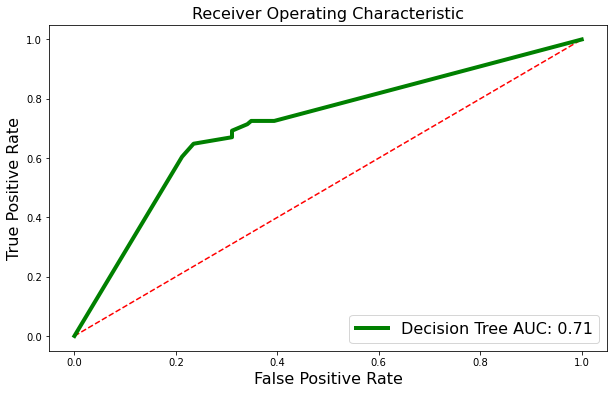

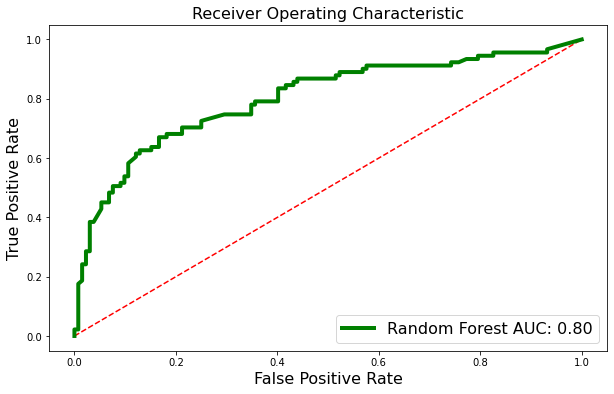

In [79]:
ROC_Curve(LogClassifier, 'Logistic Regression')
ROC_Curve(SVC_Classifier, 'Support Vector Machine')
ROC_Curve(KNN_Classifier, 'K-Nearest Neighbours')
ROC_Curve(NB_Classifier, 'Naive Bayes')
ROC_Curve(Decision_Tree_Classifier, 'Decision Tree')
ROC_Curve(RandomForest_Classifier, 'Random Forest')

With the ROC curve plotted, it reafirms our accuracy score, where the Support Vector Machine is the best model for this problem.